In [5]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings

from google.colab import files
uploaded = files.upload()

# Import our input dataset
main_df = pd.read_csv('main_data.csv')
# main_df = pd.read_csv('./resources/main_data.csv')
main_df.head()

Saving main_data.csv to main_data.csv


,Unnamed: 0,user_id,movie_id,rating
0,0,1,1193,5
1,1,2098,1193,4
2,2,1,661,3
3,3,2098,661,3
4,4,1,914,3


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411620 entries, 0 to 2411619
Data columns (total 4 columns):
 #   Column      Dtype
---  ------      -----
 0   Unnamed: 0  int64
 1   user_id     int64
 2   movie_id    int64
 3   rating      int64
dtypes: int64(4)
memory usage: 73.6 MB


In [8]:
# Split the dataframe into data and target
y = main_df["rating"].values # Target
X = main_df.drop("rating", axis=1) # Features

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
# Train the scaler with the X_train data.
X_scaler = StandardScaler().fit(X_train)

In [11]:
# Transform X_train and X_test.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.799
k: 3, Train/Test Score: 0.861/0.659
k: 5, Train/Test Score: 0.756/0.587
k: 7, Train/Test Score: 0.685/0.541
k: 9, Train/Test Score: 0.633/0.511
k: 11, Train/Test Score: 0.597/0.491
k: 13, Train/Test Score: 0.571/0.478
k: 15, Train/Test Score: 0.551/0.468
k: 17, Train/Test Score: 0.535/0.461
k: 19, Train/Test Score: 0.522/0.454


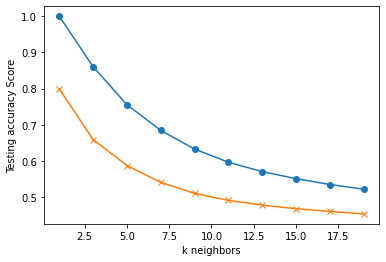

In [12]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.799


In [15]:
# Assess the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.799135021272008